# HW 2 Linear Regression

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mltools as ml
np.random.seed(0)

# Problem1 part1 

In [52]:
data = np.genfromtxt(fname = 'C:\\Users\DELL\Desktop\dataHW1\data\curve80.txt', delimiter=None) 
X = data[:,0] #Feature 

X = np.atleast_2d(X).T # code expects shape (M,N) so make sure it’s 2-D
Y = data[:,1] #label

Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
print(Xtr.shape) #printings shape
print(Xte.shape)
print(Ytr.shape)
print(Yte.shape)


(60, 1)
(20, 1)
(60,)
(20,)


#  Problem1 part2

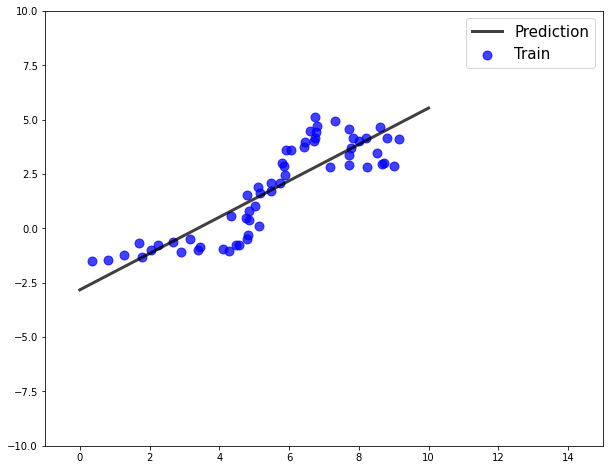

In [53]:
# Parta
lr = ml.linear.linearRegress( Xtr, Ytr ) # create and train model
xs = np.linspace(0,10,200) # densely sample possible x-values

xs = xs[:,np.newaxis] # force "xs" to be an Mx1 matrix (expected by our code)
#print(xs)

ys = lr.predict( xs ) # make predictions at xs
#print(ys)


# Plotting the data

f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(Xtr, Ytr, s=80, color='blue', alpha=0.75, label='Train')
# Also plotting the regression line
ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction')
ax.set_xlim(-1, 15)
ax.set_ylim(-10, 10)


# Controlling the size of the legend and the location.
ax.legend(fontsize=15, loc=1)

plt.show()



In [54]:
#partb
lr.theta

array([[-2.82765049,  0.83606916]])

In [57]:
def slope(xa,ya,xb,yb): #slope function to find the theta1
    x = (yb - ya) / (xb - xa)
    return x

a = slope(0.05025126,-2.78563696,0.10050251,-2.74362344) #The values are given based on xs and predicted ys
print(a)




0.8360691525086489


In [59]:
xa = 0.05025126
ya = -2.78563696
yintercept = np.subtract(ya,(a*xa)) #yintercept for the graph shown as theta1

print(yintercept)


-2.827650488360692


The parameters have been proved by the slope and y intercept functions

In [60]:
#partc
#Since the mse function of lr defined in ml tools first predict based on X and find the difference of Ypredicted an Y
#We can use the mse directly
print(lr.mse(Xtr,Ytr))
print(lr.mse(Xte,Yte))


1.127711955609391
2.2423492030101246


#  Problem1 part3

1


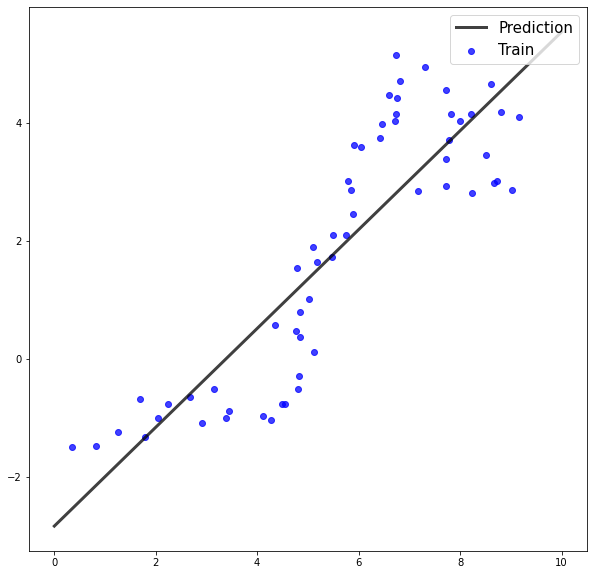

3


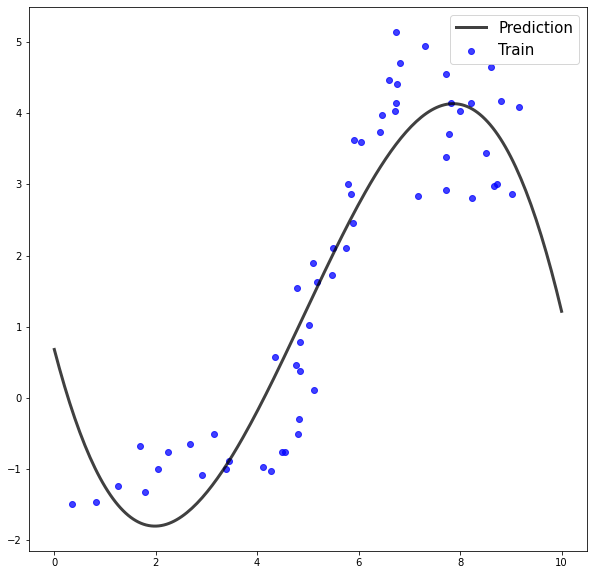

5


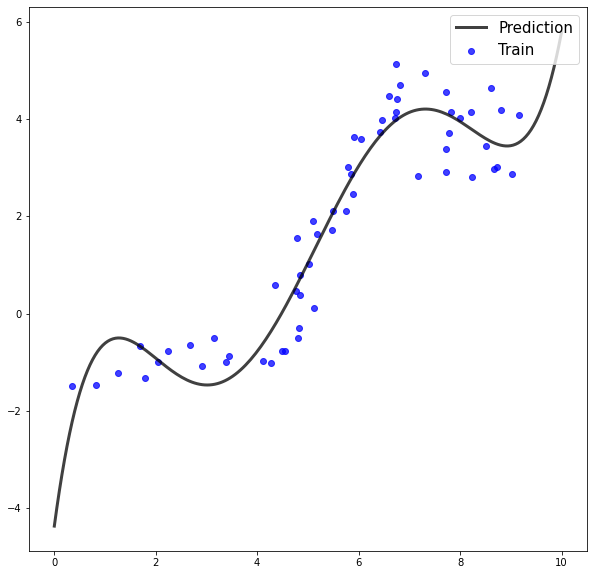

7


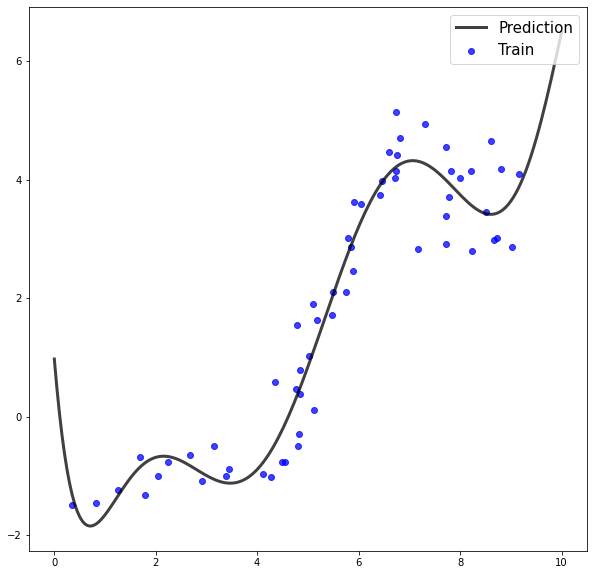

10


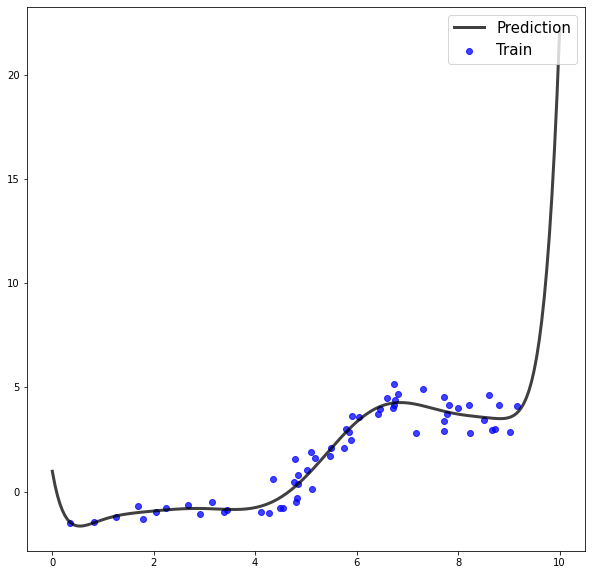

18


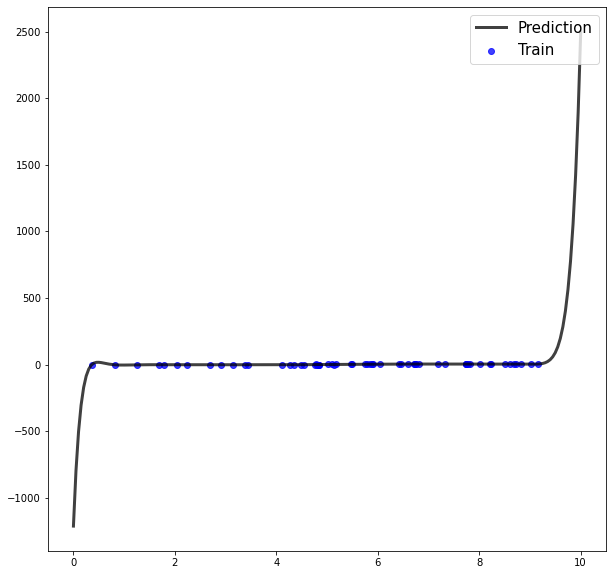

In [61]:
#parta
degrees = [1, 3, 5, 7, 10, 18]
for degree in degrees: #loop for degrees for run over degrees from 1 to 18
    print(degree)
    
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False) #Transoforming Xtr through degreee
    XtrP,params = ml.transforms.rescale(XtrP) #rescalling and getting params
    lr = ml.linear.linearRegress( XtrP, Ytr ) #Training on new Xtr and old Ytr
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params) #using params obtained to transform Xte
    xs = np.linspace(0,10,200) #Again using linspace
    xs = xs[:,np.newaxis]
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params) #Transform linspace
    ys = lr.predict( xsP ) #predicted y for xsP




    f, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(Xtr, Ytr, color='blue', alpha=0.75, label='Train')
    ax.plot(xs, ys, lw=3, color='black', alpha=0.75, label='Prediction' )


    ax.legend(fontsize=15, loc=1)

    plt.show()

[1.1277119556093909, 0.6339652063119645, 0.4042489464459175, 0.31563467398935735, 0.29894797968660153, 0.2805095801672889]
[2.242349203010126, 0.8616114815450043, 1.0344190205632802, 0.6502246079652997, 0.6090600748725564, 492.8611030440658]
[1, 3, 5, 7, 10, 18]


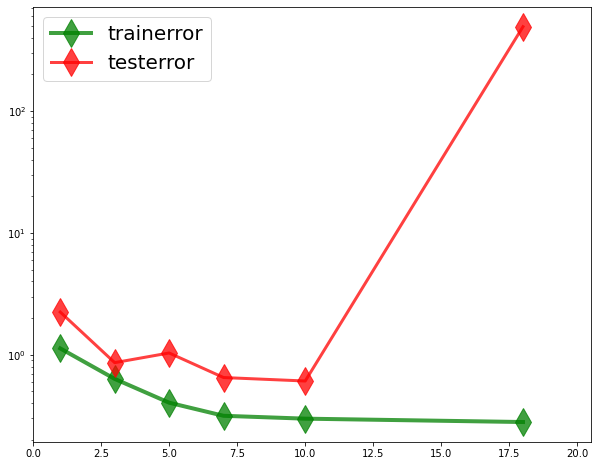

In [62]:
#partb

trainerror = [] #Create an empty list named as trainerror
testerror = [] #Create an empty list validate error
degrees = [1, 3, 5, 7, 10, 18]
for degree in degrees:
    
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress( XtrP, Ytr )
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
    xs = np.linspace(0,10,200)
    xs = xs[:,np.newaxis]
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,False), params)
    ys = lr.predict( xsP )
    
    lr.mse(XtrP,Ytr)
    lr.mse(XteP,Yte)
    trainerror.append(lr.mse(XtrP,Ytr))
    testerror.append(lr.mse(XteP,Yte)) 

print(trainerror)
print(testerror)
print(degrees)
f, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, trainerror, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='trainerror')
ax.semilogy(degrees, testerror, 'r-',lw=3, marker='d', markersize=20, alpha=0.75,label='testerror')
ax.set_xlim(0, 20.5)
ax.legend(fontsize=20, loc=0)

#partc
Since the test error is minimum for d = 10, and after that it begin to increase I will take d = 10 for this example


# Problem2 Part1

[1.2118626629641984, 0.7429005752051655, 0.5910703726407662, 0.7335637831393982, 0.7677056873095605, 175374.61792463437]


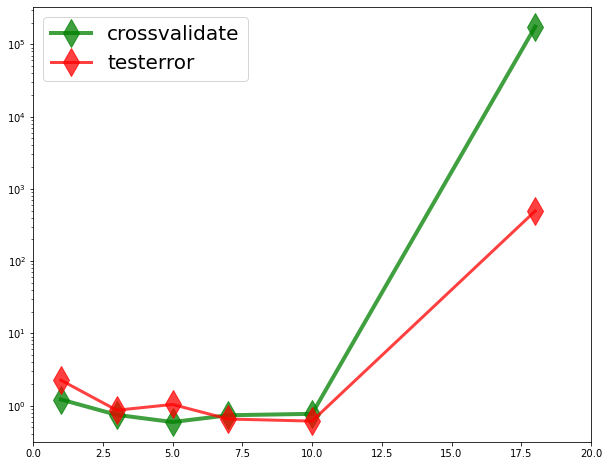

In [63]:
testerror = [2.242349203010126, 0.8616114815450043, 1.0344190205632802, 0.6502246079652997, 0.6090600748725564, 492.8611030440658]       
crossvalidate = [] #An empty array for overall cross validation error 
degrees = [1, 3, 5, 7, 10, 18]
nFolds = 5
for degree in degrees:
    J = [] #An empty arrray for cross validation error for each degree for 5folds
    for iFold in range(nFolds):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nFolds, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti )
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)
        J.append(lr.mse(XviP, Yvi)) #Appending the error to J
    Error = np.mean(J) #After adding all the errors for division of folds computing a mean of that error particular degree
    crossvalidate.append(Error)
print(crossvalidate) #Adding error for each degree to crossvalidate and printing to get an insight
    
f, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plotting a line with markers where there's an actual x value.
ax.semilogy(degrees, crossvalidate, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='crossvalidate')
ax.semilogy(degrees, testerror, 'r-',lw=3, marker='d', markersize=20, alpha=0.75,label='testerror')
ax.set_xlim(0, 20)
ax.legend(fontsize=20, loc=0)


# Problem2 Part2

The mean squared error for cross validation is showing a similar trend to the mean squared error for actual test data. Both errors are showing almost similar trend. The error curve decreases for both Test and Crossvalidation after Ist degree showing the possible solution of underfitting. The curve increases for both Test and Crossvalidation after degree 10, means that after degree 10 both cross validation data and actual test data face overfitting.

# Problem2 Part3

After looking just on cross validation error, I will recommend degree 5 since there the error is minimum.

# Problem2 Part4

1.179545864131834
0.5984555010977737
2.2195261560645148
0.5910703726407662
0.5963380050012238
0.6058256908835714
0.6448758386950445
0.6905669661743751
[1.179545864131834, 0.5984555010977737, 2.2195261560645148, 0.5910703726407662, 0.5963380050012238, 0.6058256908835714, 0.6448758386950445, 0.6905669661743751]


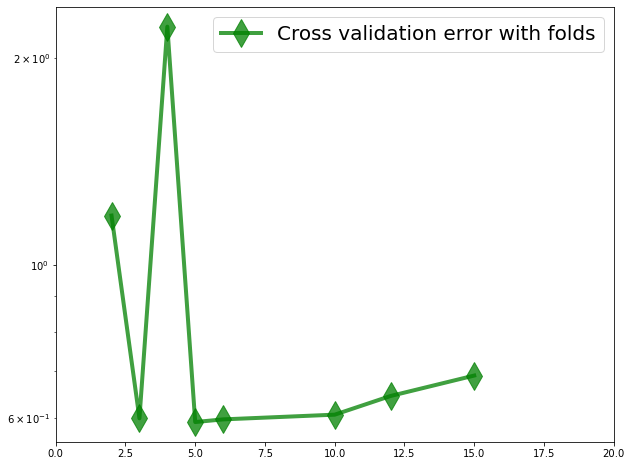

In [50]:

crossvalidate = []
degree = 5
nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
for nfold in nFolds:
    J = []
    for iFold in range(nfold):
        Xti, Xvi, Yti, Yvi = ml.crossValidate(Xtr, Ytr, nfold, iFold)
        XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
        XtiP,params = ml.transforms.rescale(XtiP)
        lr = ml.linear.linearRegress(XtiP, Yti )
        XviP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xvi,degree,False), params)
        XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,False), params)
        errorcrossvalidate = lr.mse(XviP, Yvi)
        J.append(lr.mse(XviP, Yvi))
    Error = np.mean(J)
    print(Error)
    crossvalidate.append(Error)
print(crossvalidate)

f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogy(nFolds, crossvalidate, 'g-',lw=4, marker='d', markersize=20, alpha=0.75,label='Cross validation error with folds')
ax.set_xlim(0, 20)




ax.legend(fontsize=20, loc=0)
plt.show()

    

The cross validation error decreases from n = 2 fold to n = 3 fold but after that it increases from n = 3 to n = 4, the reason of this can be that each ith training set in that fold (n = 4) had data values different than the prediction data. So each ith fold gave high error value and average of high error value at the end gave us high error. Then in n = 4 to n = 5  it again decreases then it sligtly increases for n = 6 and keep a slighly constant behaviour untill 10, after n = 10 folds it again increases because here the training data for the each ith fold is different than the prediction data and average of high error value is giving high total value of error.

# Collaborations!

I used the help from discussion notes and PIAZZA group. It also got some guidance from TAs.